# Explore Chla in DO Outlier Clusters

In [1]:
# imports
from importlib import reload

import numpy as np

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils

# Load

In [2]:
line = '90'
perc = 98.

In [3]:
grid_outliers, grid_tbl, ds = grid_utils.gen_outliers(line, perc)
clusters.generate_clusters(grid_outliers)

Found 386 unique clusters


## Fill

In [10]:
grid_utils.fill_in_grid(grid_tbl, ds)

In [11]:
grid_tbl.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,z,CT,SA,sigma0,SO,chla
0,0,32173,17,16,252.912731,88.939052,2016-12-14 19:52:21,-117.460120,10,16.249462,33.523891,24.446819,1.033524,0.169041
1,0,32174,17,16,252.951126,89.164786,2016-12-14 20:47:19,-117.463420,10,16.214990,33.522302,24.453442,1.032982,0.176322
2,0,32175,17,17,253.346587,80.334728,2016-12-14 21:38:13,-117.465688,10,16.158025,33.511012,24.457791,1.033375,0.252030
3,0,32176,17,17,254.551252,86.192469,2016-12-14 22:50:08,-117.471270,10,16.057278,33.502061,24.473762,1.036203,0.431141
4,0,32177,17,16,251.471860,85.101580,2016-12-15 00:11:51,-117.477442,10,16.372075,33.522704,24.417984,1.030055,0.267575


# Stats

## Cluster stats

In [5]:
cstats = clusters.cluster_stats(grid_outliers)

## Control

In [39]:
cluster_IDs = np.unique(grid_outliers.cluster.values[
        grid_outliers.cluster.values >= 0])

In [45]:
control_chla = []
for cluster_ID in cluster_IDs:
    in_cluster = grid_outliers.cluster.values == cluster_ID
    #
    cluster = grid_outliers[in_cluster]
    #
    control_vals = grid_utils.grab_control_values(cluster, grid_tbl, 'chla')
    # 
    control_chla.append(np.nanmean(control_vals))
#
control_chla = np.array(control_chla)

# Plot

In [46]:
pchla = (cstats.chla - control_chla) / control_chla

In [53]:
imax = np.argmax(pchla)
cstats.iloc[imax]

z                                    10.0
lon                           -117.642911
doxy                           273.173536
time        2021-04-06 01:54:39.777777664
SA                              33.717084
CT                              15.369791
sigma0                          24.789754
SO                               1.098964
chla                            10.946043
max_doxy                       277.088678
max_SO                           1.116593
max_chla                        11.865667
N                                       9
cluster                                25
Name: 25, dtype: object

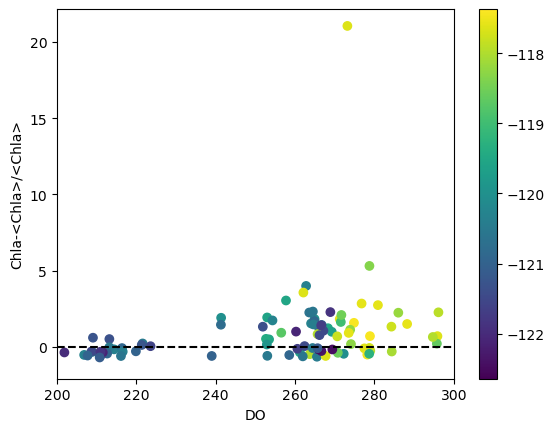

In [52]:
plt.clf()
ax = plt.gca()
sc = ax.scatter(cstats.doxy, pchla, c=cstats.lon)
plt.colorbar(sc)
#
ax.axhline(0., color='k', ls='--')
#
ax.set_xlabel('DO')
ax.set_ylabel('Chla-<Chla>/<Chla>')
#
ax.set_xlim(200.,300.)
plt.show()

----

# Testing

In [32]:
reload(grid_utils)
in_cluster = grid_outliers.cluster.values == 0
#
test = grid_outliers[in_cluster]
#
final_vals = grid_utils.grab_control_values(test, grid_tbl, 'chla')
final_vals = np.array(final_vals)
final_vals.size

864221

## Compare

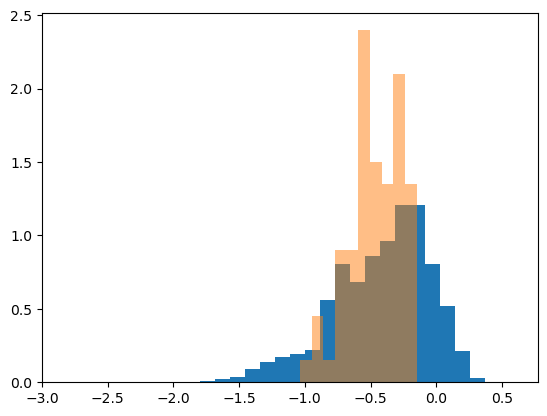

In [38]:
cut = final_vals > 0.
plt.clf()
ax = plt.gca()
#
ax.hist(np.log10(final_vals[cut]), bins=30, density=True)
ax.hist(np.log10(test.chla), bins=10, density=True, alpha=0.5)
#
plt.show()